In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

training_set = pd.read_csv('UNSW_NB15_training-set.csv')
testing_set = pd.read_csv('UNSW_NB15_testing-set.csv')

print(training_set.shape)
print(testing_set.shape)

(82332, 45)
(175341, 45)


In [2]:
frames = [training_set, testing_set]
train = pd.concat(frames)
print(train.shape)
train.head()

(257673, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
binary_dict = {'Normal': 'normal',
                'Generic': 'attack',
                'Exploits': 'attack',
                'Fuzzers': 'attack',
                'DoS': 'attack',
              'Reconnaissance': 'attack',
                'Analysis': 'attack',
                'Backdoor': 'attack',
                'Shellcode': 'attack',
               'Worms': 'attack'
              }

df_train_bi = train.copy()


df_train_bi['attack_cat'] = df_train_bi['attack_cat'].apply(binary_dict.get)



print('Train data class: ',df_train_bi['attack_cat'].unique())


print('Train data dim: ',df_train_bi.shape)


Train data class:  ['normal' 'attack']
Train data dim:  (257673, 45)


In [4]:
mask = (df_train_bi.dtypes == np.object)
print(df_train_bi.loc[:,mask].head())
list_cat = df_train_bi.loc[:,mask].columns.tolist()
print(list_cat)
print(df_train_bi.loc[:,mask].values)

  proto service state attack_cat
0   udp       -   INT     normal
1   udp       -   INT     normal
2   udp       -   INT     normal
3   udp       -   INT     normal
4   udp       -   INT     normal
['proto', 'service', 'state', 'attack_cat']
[['udp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']
 ...
 ['udp' 'dns' 'INT' 'attack']
 ['udp' 'dns' 'INT' 'attack']
 ['udp' 'dns' 'INT' 'attack']]


In [5]:
mask = (df_train_bi.dtypes != np.object)
print(df_train_bi.loc[:,mask].head())
list_num = df_train_bi.loc[:,mask].columns.tolist()
print(list_num)
print(df_train_bi.loc[:,mask].values)

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  180363632.0  ...                 1                 1               2   
1  881000000.0  ...                 1                 1               2   
2  854400000.0  ...                 1                 1               3   
3  600000000.0  ...                 2                 1               3   
4  850400000.0  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0    

In [6]:
df_train_bi.loc[:,mask].describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [7]:
# number of occurrences for each attack category
df_train_bi.attack_cat.value_counts()

attack    164673
normal     93000
Name: attack_cat, dtype: int64

In [8]:
mask = (df_train_bi.label == 1)
print(df_train_bi.loc[mask,:].service.value_counts())
print(df_train_bi.loc[mask,:].proto.value_counts())

-           77434
dns         58100
http        17650
smtp         4695
ftp          3004
ftp-data     1890
pop3         1524
dhcp          120
snmp          108
ssl            86
irc            30
radius         17
ssh            15
Name: service, dtype: int64
udp       70682
tcp       56072
unas      15599
ospf       3169
sctp       1474
          ...  
netblt      131
rdp         131
hmp         131
egp         131
argus       131
Name: proto, Length: 129, dtype: int64


In [9]:
mask = (df_train_bi.label == 0)
print(df_train_bi.loc[mask,:].service.value_counts())
print(df_train_bi.loc[mask,:].proto.value_counts())

-           63887
dns         10561
http         9361
ftp-data     3501
smtp         2214
ftp          1976
ssh          1491
radius          4
pop3            4
snmp            1
Name: service, dtype: int64
tcp     66969
udp     22019
arp      3846
ospf      102
igmp       48
icmp       15
rtp         1
Name: proto, dtype: int64


In [10]:
Y = df_train_bi.label
X =  df_train_bi.drop(columns=['id','attack_cat','label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [11]:
X.shape

(257673, 42)

In [12]:
df_train_bi.label.unique()

array([0, 1], dtype=int64)

In [13]:
X = pd.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
Y.shape

(257673,)

In [15]:
Y.unique()

array([0, 1], dtype=int64)

In [17]:
X.shape

(257673, 196)

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
y_train.unique()

array([1, 0], dtype=int64)

In [20]:
y_test.unique()

array([0, 1], dtype=int64)

In [ ]:
# y_train[1].value_counts()

In [ ]:
# X_train= X.iloc[X_train]
# print(X_train.shape)
# X_train.head()

In [ ]:
# X_test= X.iloc[X_test]
# y_train=Y.iloc[y_train]
# y_test=Y.iloc[y_test]

In [22]:
# y_train[0].unique()

array([0], dtype=int64)

In [23]:
colNames_train=list(X_train.columns)
colNames_test=list(X_test.columns)

In [24]:
print(len(colNames_train))
print(len(colNames_test))

196
196


In [25]:
print("Training data dim: ",X_train.shape)
print("Testing data dim: ",X_test.shape)
print("Training label dim: ",y_train.shape)
print("Testing label dim: ",y_test.shape)

Training data dim:  (206138, 196)
Testing data dim:  (51535, 196)
Training label dim:  (206138,)
Testing label dim:  (51535,)


In [26]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newTrain = selector.fit_transform(X_train,y_train)
X_newTrain.shape

(206138, 20)

In [27]:
true=selector.get_support()
newcolindex_X_train=[i for i, x in enumerate(true) if x]
newcolname_X_train=list( colNames_train[i] for i in newcolindex_X_train )
newcolname_X_train

['rate',
 'sttl',
 'dload',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'dmean',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'proto_tcp',
 'service_dns',
 'state_CON',
 'state_FIN',
 'state_INT']

In [28]:
## Feature Ranking

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newTrain, y_train)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_X_train)))

DoS Features sorted by their rank:
[(1, 'sttl'), (2, 'rate'), (3, 'stcpb'), (4, 'ct_srv_dst'), (5, 'dmean'), (6, 'proto_tcp'), (7, 'dload'), (8, 'ct_dst_src_ltm'), (9, 'dtcpb'), (10, 'ct_src_dport_ltm'), (11, 'ct_dst_sport_ltm'), (12, 'ct_state_ttl'), (13, 'ct_srv_src'), (14, 'ct_src_ltm'), (15, 'service_dns'), (16, 'state_FIN'), (17, 'state_INT'), (18, 'state_CON'), (19, 'dwin'), (20, 'swin')]


In [29]:
##################################################
#####sample prediction###########################
clf=DecisionTreeClassifier(random_state=0)

clf.fit(X_newTrain, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [30]:
X_newTest = X_test[newcolname_X_train]
# X_newTest = X_test.loc[:, newcolname_X_train]

clf.predict(X_newTest)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [31]:
clf.predict(X_newTest)[0:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
y_pred = clf.predict(X_newTest)

pd.crosstab(y_test,y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,16758,1917
1,1873,30987


In [38]:
### Prediction with selected 20 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf, X_newTest, y_test,  scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf, X_newTest, y_test,  scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf, X_newTest, y_test,  scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf, X_newTest, y_test,  scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.91338 (+/- 0.00350)
Precision: 0.93130 (+/- 0.00849)
Recall: 0.93302 (+/- 0.00988)
F-measure: 0.93214 (+/- 0.00283)


In [40]:
dlf_all=DecisionTreeClassifier(random_state=0)

dlf_all.fit(X_train, y_train)

y_prediction = dlf_all.predict(X_test)

pd.crosstab(y_test,y_prediction, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,17119,1556
1,1613,31247


In [41]:
### Prediction with selected all 123 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(dlf_all, X_test, y_test,  scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(dlf_all, X_test, y_test,  scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(dlf_all, X_test, y_test, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(dlf_all, X_test, y_test,  scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.92382 (+/- 0.00173)
Precision: 0.94134 (+/- 0.00417)
Recall: 0.93904 (+/- 0.00355)
F-measure: 0.94019 (+/- 0.00128)


In [ ]:
##################################################################
##############End of sample Prediction###########################

In [42]:
from feature_selector import FeatureSelector

###############################
##################################
###https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0########

In [43]:
X_train.shape

(206138, 196)

In [46]:
FS_df_train= pd.concat([X_train, y_train], axis=1, sort=False)
FS_df_train.shape

(206138, 197)

In [45]:
y_train.shape

(206138,)

In [47]:

fs = FeatureSelector(data = X_train, labels = y_train )

In [48]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [49]:
fs.identify_collinear(correlation_threshold = 0.80)

21 features with a correlation magnitude greater than 0.80.



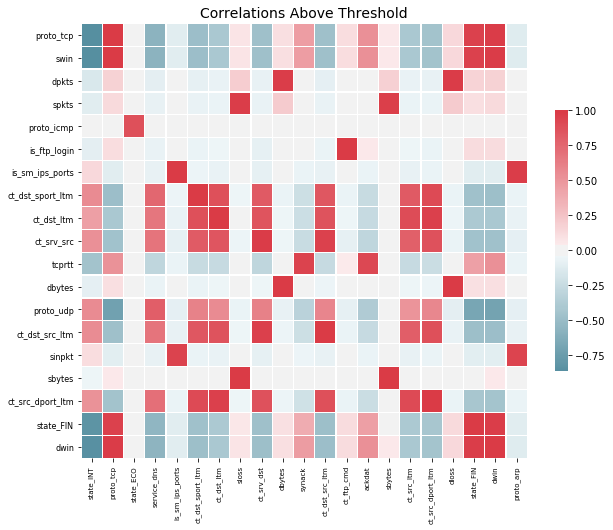

In [50]:
fs.plot_collinear()

In [51]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(21)

,drop_feature,corr_feature,corr_value
0,sbytes,spkts,0.964065
1,dbytes,dpkts,0.972966
2,sloss,spkts,0.971578
3,sloss,sbytes,0.995699
4,dloss,dpkts,0.979316
5,dloss,dbytes,0.996612
6,dwin,swin,0.980664
7,synack,tcprtt,0.945829
8,ackdat,tcprtt,0.919371
9,ct_dst_ltm,ct_srv_src,0.840543


In [52]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.992384	valid_0's binary_logloss: 0.104944
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.99248	valid_0's binary_logloss: 0.103645
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[993]	valid_0's auc: 0.992618	valid_0's binary_logloss: 0.103292
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[988]	valid_0's auc: 0.992174	valid_0's binary_logloss: 0.105533
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[996]	valid_0's auc: 0.992274	valid_0's binary_logloss: 0.104417
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. 

In [53]:
print(zero_importance_features)

['proto_snp', 'proto_smp', 'proto_sm', 'proto_skip', 'state_ACC', 'state_URN', 'proto_secure-vmtp', 'proto_sdrp', 'proto_pri-enc', 'proto_scps', 'proto_ptp', 'proto_sccopmce', 'proto_sat-mon', 'proto_sprite-rpc', 'state_CLO', 'proto_rtp', 'proto_rsvp', 'proto_rdp', 'proto_qnx', 'proto_prm', 'proto_pvp', 'proto_pup', 'proto_sat-expak', 'proto_swipe', 'proto_sps', 'proto_vmtp', 'service_ssh', 'state_PAR', 'proto_pnni', 'proto_zero', 'proto_xtp', 'proto_xns-idp', 'proto_xnet', 'proto_wsn', 'proto_wb-mon', 'proto_wb-expak', 'proto_vrrp', 'proto_visa', 'proto_srp', 'proto_vines', 'proto_uti', 'proto_ttp', 'proto_trunk-2', 'proto_trunk-1', 'proto_tp++', 'state_ECO', 'proto_tcp', 'proto_tcf', 'proto_sun-nd', 'proto_stp', 'proto_tlsp', 'proto_isis', 'proto_pipe', 'proto_crtp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_hmp', 'proto_i-nlsp', 'proto_crud

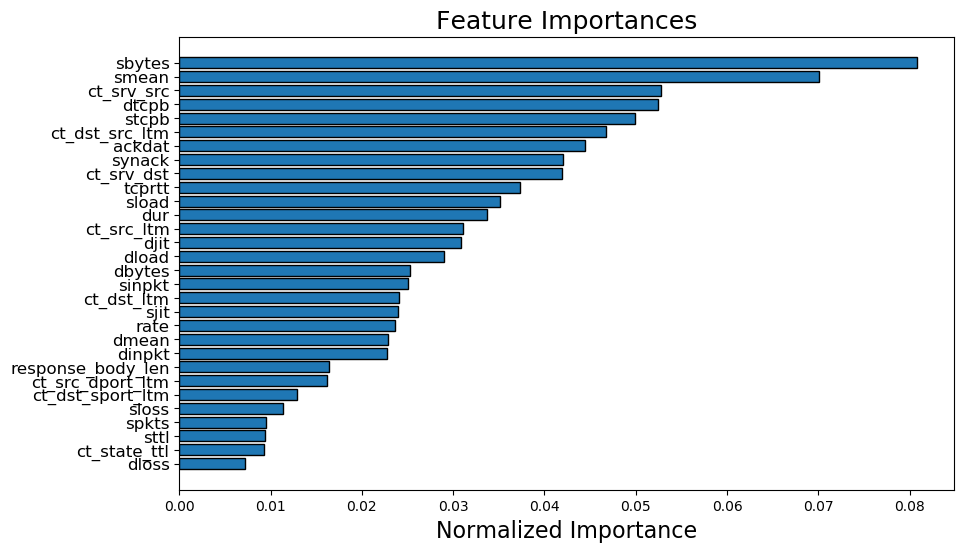

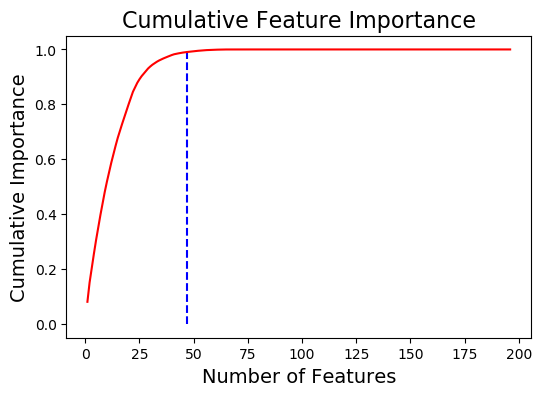

47 features required for 0.99 of cumulative importance


In [55]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 30)

In [56]:
fs.identify_low_importance(cumulative_importance = 0.99)

46 features required for cumulative importance of 0.99 after one hot encoding.
150 features do not contribute to cumulative importance of 0.99.



In [57]:
fs.feature_importances.head(50)

,feature,importance,normalized_importance,cumulative_importance
0,sbytes,2396.4,0.080826,0.080826
1,smean,2075.9,0.070016,0.150842
2,ct_srv_src,1565.0,0.052784,0.203626
3,dtcpb,1555.8,0.052474,0.256100
4,stcpb,1479.4,0.049897,0.305997
5,ct_dst_src_ltm,1384.7,0.046703,0.352700
6,ackdat,1316.9,0.044416,0.397116
7,synack,1247.0,0.042059,0.439175
8,ct_srv_dst,1242.9,0.041920,0.481095
9,tcprtt,1107.1,0.037340,0.518436


In [58]:
fs.identify_single_unique()

0 features with a single unique value.



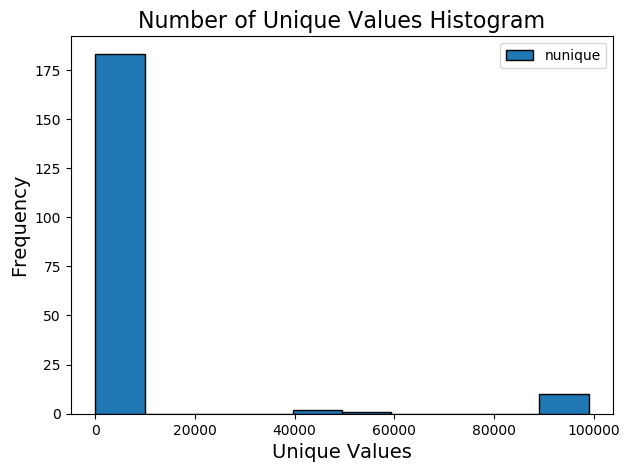

In [59]:
fs.plot_unique()

In [60]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.90, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.90})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

17 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.992519	valid_0's binary_logloss: 0.103827
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.992043	valid_0's binary_logloss: 0.106797
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[992]	valid_0's auc: 0.992606	valid_0's binary_logloss: 0.103155
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.992519	valid_0's binary_logloss: 0.10352
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[99

In [61]:
fs.feature_importances.head(50)

,feature,importance,normalized_importance,cumulative_importance
0,sbytes,2436.7,0.081509,0.081509
1,smean,2087.8,0.069838,0.151346
2,ct_srv_src,1601.0,0.053554,0.204900
3,dtcpb,1572.1,0.052587,0.257488
4,stcpb,1523.0,0.050945,0.308433
5,ct_dst_src_ltm,1380.4,0.046175,0.354608
6,ackdat,1332.6,0.044576,0.399184
7,synack,1275.3,0.042659,0.441843
8,ct_srv_dst,1241.7,0.041535,0.483378
9,tcprtt,1118.1,0.037401,0.520779


In [62]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
from info_gain import info_gain

In [70]:

var_dict={}

for i in X_train.columns:
    ig=info_gain.info_gain(X_train[i], y_train)
    print('Information Gain of {} is : {}'.format(i,ig))
    var_dict.update({i: ig})


Information Gain of dur is : 0.53920544530496
Information Gain of spkts is : 0.16108304661521
Information Gain of dpkts is : 0.24271487333693242
Information Gain of sbytes is : 0.4721808869636277
Information Gain of dbytes is : 0.3487137703700318
Information Gain of rate is : 0.5396819961287198
Information Gain of sttl is : 0.3076048889769557
Information Gain of dttl is : 0.3035448141157595
Information Gain of sload is : 0.6182319259102407
Information Gain of dload is : 0.4937777631755118
Information Gain of sloss is : 0.10983128248083118
Information Gain of dloss is : 0.1267401884767867
Information Gain of sinpkt is : 0.4568420158287161
Information Gain of dinpkt is : 0.4808613284239147
Information Gain of sjit is : 0.4170511531024683
Information Gain of djit is : 0.39155235317863113
Information Gain of swin is : 0.0677541810204757
Information Gain of stcpb is : 0.3812609184378326
Information Gain of dtcpb is : 0.3811391835695144
Information Gain of dwin is : 0.05822726188475391
Infor

Information Gain of proto_snp is : 0.00022567214838756493
Information Gain of proto_sprite-rpc is : 0.0002343547151751474
Information Gain of proto_sps is : 0.00022133094471564474
Information Gain of proto_srp is : 0.00021916036280945645
Information Gain of proto_st2 is : 0.0002452082226302643
Information Gain of proto_stp is : 0.0002365253900904335
Information Gain of proto_sun-nd is : 0.00045583202984611753
Information Gain of proto_swipe is : 0.00044062818457427967
Information Gain of proto_tcf is : 0.00023218405354745626
Information Gain of proto_tcp is : 0.06770682071615053
Information Gain of proto_tlsp is : 0.00021481923885631384
Information Gain of proto_tp++ is : 0.00024303749456321827
Information Gain of proto_trunk-1 is : 0.00024303749456321827
Information Gain of proto_trunk-2 is : 0.00022350153990825534
Information Gain of proto_ttp is : 0.0002386960782935245
Information Gain of proto_udp is : 0.01900922234015634
Information Gain of proto_unas is : 0.028183408956901274
Inf

In [71]:

sorted(var_dict.items())

[('ackdat', 0.34009946209189046),
 ('ct_dst_ltm', 0.08332549462034056),
 ('ct_dst_sport_ltm', 0.15021731859380183),
 ('ct_dst_src_ltm', 0.08202764358702241),
 ('ct_flw_http_mthd', 0.0008541128366405526),
 ('ct_ftp_cmd', 8.157087400992302e-05),
 ('ct_src_dport_ltm', 0.0940769515189146),
 ('ct_src_ltm', 0.07454808536817037),
 ('ct_srv_dst', 0.0973816932181153),
 ('ct_srv_src', 0.08274904032390751),
 ('ct_state_ttl', 0.3136587682562172),
 ('dbytes', 0.3487137703700318),
 ('dinpkt', 0.4808613284239147),
 ('djit', 0.39155235317863113),
 ('dload', 0.4937777631755118),
 ('dloss', 0.1267401884767867),
 ('dmean', 0.2837122648851427),
 ('dpkts', 0.24271487333693242),
 ('dtcpb', 0.3811391835695144),
 ('dttl', 0.3035448141157595),
 ('dur', 0.53920544530496),
 ('dwin', 0.05822726188475391),
 ('is_ftp_login', 8.388484042214095e-05),
 ('is_sm_ips_ports', 0.015042261567853168),
 ('proto_3pc', 0.0002386960782935245),
 ('proto_a/n', 0.00022784277015374006),
 ('proto_aes-sp3-d', 0.0002343547151751474),
 

In [76]:
var_dict_R={}

for i in X_train.columns:
    ig=info_gain.info_gain_ratio(X_train[i], y_train)
    print('Information Gain of {} is : {}'.format(i,ig))
    var_dict_R.update({i: ig})

Information Gain of dur is : 0.5717090610271974
Information Gain of spkts is : 0.17079322571695635
Information Gain of dpkts is : 0.2573458661091833
Information Gain of sbytes is : 0.5006442235914149
Information Gain of dbytes is : 0.3697344378871219
Information Gain of rate is : 0.5722143386098995
Information Gain of sttl is : 0.32614748937657473
Information Gain of dttl is : 0.32184267085738893
Information Gain of sload is : 0.6554993035340705
Information Gain of dload is : 0.5235429719770766
Information Gain of sloss is : 0.1164519756342885
Information Gain of dloss is : 0.13438016025133645
Information Gain of sinpkt is : 0.48438071644378633
Information Gain of dinpkt is : 0.5098479270773014
Information Gain of sjit is : 0.442191237526675
Information Gain of djit is : 0.4151553552137053
Information Gain of swin is : 0.07183844219150101
Information Gain of stcpb is : 0.4042435468417462
Information Gain of dtcpb is : 0.40411447372524395
Information Gain of dwin is : 0.0617372348669253

Information Gain of proto_smp is : 0.0002300700643306458
Information Gain of proto_snp is : 0.0002392757958549094
Information Gain of proto_sprite-rpc is : 0.0002484817527840484
Information Gain of proto_sps is : 0.00023467290191789134
Information Gain of proto_srp is : 0.0002323714760805323
Information Gain of proto_st2 is : 0.0002599895159382339
Information Gain of proto_stp is : 0.00025078327723714744
Information Gain of proto_sun-nd is : 0.0004833098479227248
Information Gain of proto_swipe is : 0.0004671895060751955
Information Gain of proto_tcf is : 0.0002461802424195283
Information Gain of proto_tcp is : 0.0717882269806728
Information Gain of proto_tlsp is : 0.0002277686666677858
Information Gain of proto_tp++ is : 0.00025768793512935615
Information Gain of proto_trunk-1 is : 0.00025768793512935615
Information Gain of proto_trunk-2 is : 0.00023697434184258593
Information Gain of proto_ttp is : 0.00025308481577904793
Information Gain of proto_udp is : 0.020155109243753102
Informa

In [77]:
sorted(var_dict_R.items())

[('ackdat', 0.3606008541298035),
 ('ct_dst_ltm', 0.08834840357014379),
 ('ct_dst_sport_ltm', 0.15927250533368423),
 ('ct_dst_src_ltm', 0.08697231732681616),
 ('ct_flw_http_mthd', 0.0009055992518229761),
 ('ct_ftp_cmd', 8.648801341575016e-05),
 ('ct_src_dport_ltm', 0.09974796450128709),
 ('ct_src_ltm', 0.07904188701786465),
 ('ct_srv_dst', 0.10325191793914394),
 ('ct_srv_src', 0.0877372002757252),
 ('ct_state_ttl', 0.3325662999958946),
 ('dbytes', 0.3697344378871219),
 ('dinpkt', 0.5098479270773014),
 ('djit', 0.4151553552137053),
 ('dload', 0.5235429719770766),
 ('dloss', 0.13438016025133645),
 ('dmean', 0.30081460410261257),
 ('dpkts', 0.2573458661091833),
 ('dtcpb', 0.40411447372524395),
 ('dttl', 0.32184267085738893),
 ('dur', 0.5717090610271974),
 ('dwin', 0.061737234866925346),
 ('is_ftp_login', 8.894146705999031e-05),
 ('is_sm_ips_ports', 0.01594901778452742),
 ('proto_3pc', 0.00025308481577904793),
 ('proto_a/n', 0.00024157726395503834),
 ('proto_aes-sp3-d', 0.000248481752784048

In [78]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [79]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[4.836e+03 3.625e+05 1.340e+06 2.611e+08 1.139e+09 6.527e+09 4.686e+06
 1.153e+04 2.750e+12 2.261e+11 3.269e+02 5.156e+05 2.675e+08 2.541e+06
 2.954e+07 1.316e+07 3.630e+06 2.702e+13 2.637e+13 3.198e+06 2.385e+01
 4.951e+01 5.483e-02 4.679e+04 9.471e+06 4.739e+00 7.974e+07 1.562e+05
 3.471e+04 1.312e+05 2.642e+05 2.389e+05 2.737e+05 1.561e+01 1.662e+01
 1.191e+02 1.358e+05 1.634e+05 5.322e+03 6.203e+01 5.921e+01 6.090e+01
 1.810e+02 6.090e+01 6.203e+01 5.558e+03 5.921e+01 5.864e+01 5.808e+01
 6.259e+01 5.639e+01 5.921e+01 5.526e+01 6.146e+01 5.751e+01 6.203e+01
 5.977e+01 5.639e+01 6.203e+01 5.977e+01 5.582e+01 5.864e+01 5.751e+01
 5.808e+01 6.090e+01 6.203e+01 6.146e+01 5.639e+01 5.977e+01 5.639e+01
 5.808e+01 1.477e+02 6.090e+01 5.639e+01 5.808e+01 5.695e+01 2.306e+01
 6.033e+01 6.033e+01 5.695e+01 6.146e+01 6.739e+01 5.639e+01 5.977e+01
 6.203e+01 6.090e+01 5.808e+01 5.977e+01 6.146e+01 6.203e+01 5.808e+01
 1.156e+02 6.259e+01 5.808e+01 5.977e+01 5.921e+01 5.977e+01 5.695e+01
 6.146

ValueError: Expected 2D array, got 1D array instead:
array=["From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)\nSubject: Re: Biosphere II\nReply-To: nicho@vnet.ibm.com\nDisclaimer: This posting represents the poster's views, not those of IBM\nNews-Software: UReply 3.1\nX-X-From: nicho@vnet.ibm.com\n            <1q1kia$gg8@access.digex.net>\nLines: 18\n\nIn <1q1kia$gg8@access.digex.net> Pat writes:\n>In article <19930408.043740.516@almaden.ibm.com> nicho@vnet.ibm.com writes:\n>>In <1q09ud$ji0@access.digex.net> Pat writes:\n>>>Why is everyone being so critical of B2?\n>> Because it's bogus science, promoted as 'real' science.\n>It seems to me, that it's sorta a large engineering project more\n>then a science project.\n  Bingo.\n>B2 is not bench science,  but rather a large scale attempt to\n>re-create a series of micro-ecologies.   what's so eveil about this?\n Nothing evil at all. There's no actual harm in what they're doing, only\nhow they represent it.\n\n -----------------------------------------------------------------\n .sig files are like strings ... every yo-yo's got one.\n\nGreg Nicholls ... nicho@vnet.ibm.com (business) or\n                  nicho@olympus.demon.co.uk (private)\n"
 'From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)\nSubject: Re: Why DC-1 will be the way of the future.\nOrganization: Texas Instruments Inc\nLines: 22\n\nIn <1r6ub0$mgl@access.digex.net> prb@access.digex.com (Pat) writes:\n\n>In article <1993Apr22.164801.7530@julian.uwo.ca> jdnicoll@prism.ccs.uwo.ca (James Davis Nicoll) writes:\n>>\tHmmm. I seem to recall that the attraction of solid state record-\n>>players and radios in the 1960s wasn\'t better performance but lower\n>>per-unit cost than vacuum-tube systems.\n>>\n\n\n>I don\'t think so at first,  but solid state offered  better reliabity,\n>id bet,  and any lower costs would be only after the processes really scaled up.\n\nCareful.  Making statements about how solid state is (generally) more\nreliable than analog will get you a nasty follow-up from Tommy Mac or\nPat.  Wait a minute; you *are* Pat.  Pleased to see that you\'re not\nsuffering from the bugaboos of a small mind.  ;-)\n\n-- \n"Insisting on perfect safety is for people who don\'t have the balls to live\n in the real world."   -- Mary Shafer, NASA Ames Dryden\n------------------------------------------------------------------------------\nFred.McCall@dseg.ti.com - I don\'t speak for others and they don\'t speak for me.\n'
 "From: ch981@cleveland.Freenet.Edu (Tony Alicea)\nSubject: Re: OTO, the Ancient Order of Oriental Templars\nOrganization: Case Western Reserve University, Cleveland, OH (USA)\nLines: 11\nReply-To: ch981@cleveland.Freenet.Edu (Tony Alicea)\nNNTP-Posting-Host: hela.ins.cwru.edu\n\n\nIn a previous article, shades@sorinc.cutler.com (Darrin A. Hyrup) says:\n\n>They [Thelema Lodge] don't have an internet address, but they do have a CIS\n>address which can be reached via uucp/internet.  It is 72105,1351 so I guess\n>that would be '72105.1351@cis.com' or something like that.\n>\n\t\t......@compuserve.com\n\nTony\n\n"
 ...
 'From: robert@cpuserver.acsc.com (Robert Grant)\nSubject: Re: Virtual Reality for X on the CHEAP!\nOrganization: USCACSC, Los Angeles\nLines: 11\nDistribution: world\nReply-To: robert@cpuserver.acsc.com (Robert Grant)\nNNTP-Posting-Host: cpuserver.acsc.com\n\nUpdate on location!!\n\nDirectory should be:\npublic/virtual-worlds!!\n^^^^^^\n\nSorry! :-)\n\nRobert.\nrobert@acsc.com\n\n'
 "From: xrcjd@resolve.gsfc.nasa.gov (Charles J. Divine)\nSubject: Space Station radio commercial\nOrganization: NASA/GSFC Greenbelt Maryland\nLines: 13\n\nA brief political/cultural item.\n\nRadio station WGMS in Washington is a classical music station with\na large audience among high officials (elected and otherwise).  \nImagine a radio station that advertises Mercedes Benzes, diamond\njewelry, expensive resorts and (truthfully) Trident submarines.\n\nThis morning I heard a commercial for the space station project.\nDidn't catch the advertiser.\n\nGuess they're pulling out all the stops.\n-- \nChuck Divine\n"
 'From: wdm@world.std.com (Wayne Michael)\nSubject: Adobe Photo Shop type software for Unix/X/Motif platforms?\nSummary: Searching for Adobe Photo Shop type software for Unix/X/Motif platforms\nKeywords: Image Enhancement\nOrganization: n/a\nLines: 19\n\nHello,\n\n    I have been searching for a quality image enhancement and\n    manipulation package for Unix/X/Motif platforms that is comparable\n    to Adobe Photo Shop for the Mac.\n\n    I have not been able to find any, and would appreciate any\n    information about such products you could provide.\n\n    I would be particularly interested in software that runs on HP or\n    Sun workstations, and does not require special add-in hardware, but\n    would also be interested in other solutions.\n\n\nThank You.\nWayne\n-- \nWayne Michael\nwdm@world.std.com\n'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'var_dict_R' is not defined